In [2]:
pip install scikit-fuzzy

Final Price (0-100): 91.1904761904762


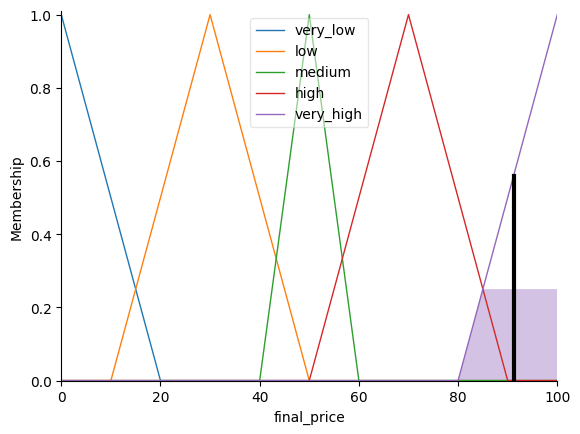

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand       = ctrl.Antecedent(np.arange(0, 11, 1), 'demand')
competitor   = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor')
production   = ctrl.Antecedent(np.arange(0, 11, 1), 'production')
seasonality  = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock        = ctrl.Antecedent(np.arange(0, 11, 1), 'stock')

final_price  = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')

demand['low']    = fuzz.trimf(demand.universe, [0, 0, 4])
demand['medium'] = fuzz.trimf(demand.universe, [3, 5, 7])
demand['high']   = fuzz.trimf(demand.universe, [6, 10, 10])

competitor['low']    = fuzz.trimf(competitor.universe, [0, 0, 4])
competitor['medium'] = fuzz.trimf(competitor.universe, [3, 5, 7])
competitor['high']   = fuzz.trimf(competitor.universe, [6, 10, 10])

production['low']    = fuzz.trimf(production.universe, [0, 0, 4])
production['medium'] = fuzz.trimf(production.universe, [3, 5, 7])
production['high']   = fuzz.trimf(production.universe, [6, 10, 10])

seasonality['offpeak'] = fuzz.trimf(seasonality.universe, [0, 0, 4])
seasonality['normal']  = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['peak']    = fuzz.trimf(seasonality.universe, [6, 10, 10])

stock['low']    = fuzz.trimf(stock.universe, [0, 0, 4])
stock['medium'] = fuzz.trimf(stock.universe, [3, 5, 7])
stock['high']   = fuzz.trimf(stock.universe, [6, 10, 10])

final_price['very_low']  = fuzz.trimf(final_price.universe, [0, 0, 20])
final_price['low']       = fuzz.trimf(final_price.universe, [10, 30, 50])
final_price['medium']    = fuzz.trimf(final_price.universe, [40, 50, 60])
final_price['high']      = fuzz.trimf(final_price.universe, [50, 70, 90])
final_price['very_high'] = fuzz.trimf(final_price.universe, [80, 100, 100])

rule1  = ctrl.Rule(demand['high'] & competitor['high'] & stock['low'],
                   final_price['very_high'])
rule2  = ctrl.Rule(demand['high'] & seasonality['peak'] & stock['low'],
                   final_price['very_high'])
rule3  = ctrl.Rule(demand['medium'] & production['high'] & stock['low'],
                   final_price['very_high'])

rule4  = ctrl.Rule(demand['high'] & competitor['medium'] & stock['medium'],
                   final_price['high'])
rule5  = ctrl.Rule(demand['medium'] & competitor['medium'] & stock['low'],
                   final_price['high'])

rule6  = ctrl.Rule(demand['medium'] & competitor['medium'] & stock['medium'],
                   final_price['medium'])
rule7  = ctrl.Rule(demand['low'] & competitor['high'] & stock['medium'],
                   final_price['medium'])

rule8  = ctrl.Rule(demand['low'] & competitor['low'] & stock['high'],
                   final_price['low'])
rule9  = ctrl.Rule(demand['medium'] & production['low'] & stock['high'],
                   final_price['low'])
rule10 = ctrl.Rule(demand['low'] & seasonality['offpeak'],
                   final_price['very_low'])
rules = [
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9,
    rule10
]

price_ctrl = ctrl.ControlSystem(rules)
price_sim  = ctrl.ControlSystemSimulation(price_ctrl)

price_sim.input['demand']      = 8
price_sim.input['competitor']  = 7
price_sim.input['production']  = 6
price_sim.input['seasonality'] = 9
price_sim.input['stock']       = 3

price_sim.compute()

print("Final Price (0-100):", price_sim.output['final_price'])

final_price.view(sim=price_sim)
